# Assignment 1
Submitted by : Sia Zhi Min



## Titanic
- For this problem, use only 1 target output variable (Survived)
- Prepare the data and perform necessary feature engineering
- Create **_at least two models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing¶

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Seaborn version={}".format(seaborn.__version__))
print("Python version={}".format(platform.python_version()))



************************
        Versions        
************************
Scikit-learn version=0.23.1
Numpy version=1.18.5
Pandas version=1.0.5
Matplotlib version=3.2.2
Seaborn version=0.11.1
Python version=3.8.3


In [3]:
# import sklearn modules
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [4]:
url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
titanic = pd.read_csv(url)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
url2='https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv'
titanictest = pd.read_csv(url2)
titanictest.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# List out all variables with nulls/missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Get list of numeric and nonnumeric variables
numvars = list(titanic.columns[titanic.dtypes != "object"])
nonnumvars = list(titanic.columns[titanic.dtypes == "object"])
print(numvars)
print(nonnumvars)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
# Do some further exploration on list to get list of features used
numvars.remove('PassengerId')
numvars.remove('Survived')
numfeats = numvars
print(numfeats)

#nonnumvars.remove('Cabin')
nonnumvars.remove('Name')
nonnumvars.remove('Ticket')
nonnumfeats = nonnumvars
print(nonnumfeats)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


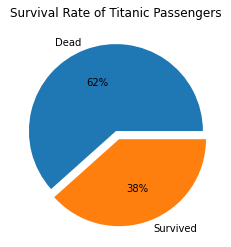

In [10]:
survived=titanic[(titanic['Survived']==1)]
dead=titanic[(titanic['Survived']==0)]
y=[len(dead['Survived']),len(survived['Survived'])]
mylabels=['Dead','Survived']
explode=[0,0.1]
plt.pie(y, labels = mylabels,explode=explode,autopct='%1.0f%%')
plt.title('Survival Rate of Titanic Passengers')
plt.show() 


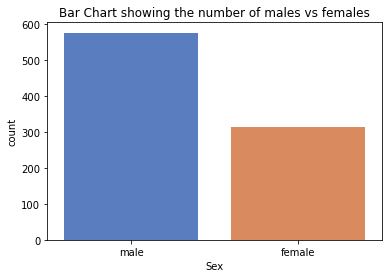

In [11]:
sns.countplot(x=titanic['Sex'],palette="muted",alpha=1)

plt.title('Bar Chart showing the number of males vs females')
plt.show()

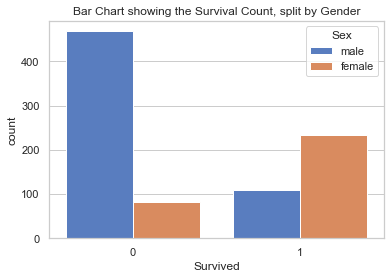

In [12]:
%matplotlib inline

sns.set(style="whitegrid")
sns.countplot(x=titanic['Survived'],hue=titanic['Sex'],palette="muted",alpha=1)

plt.title('Bar Chart showing the Survival Count, split by Gender')
plt.show()

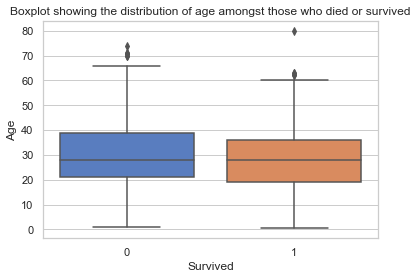

In [13]:
# sns.histplot(x=titanic['Age'],hue=titanic['Survived'],bins=10, palette='muted',alpha=1,multiple='stack')
sns.set(style="whitegrid")
sns.boxplot(x='Survived',y='Age',data=titanic,palette='muted')
plt.title('Boxplot showing the distribution of age amongst those who died or survived')
plt.show()

Text(0.5, 1.0, 'Histogram showing the distribution of age vs gender')

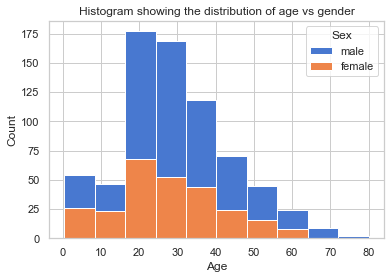

In [14]:
sns.set(style='whitegrid')
sns.histplot(data=titanic,x='Age',hue='Sex',palette="muted",multiple='stack',bins=10,alpha=1)
plt.title('Histogram showing the distribution of age vs gender')


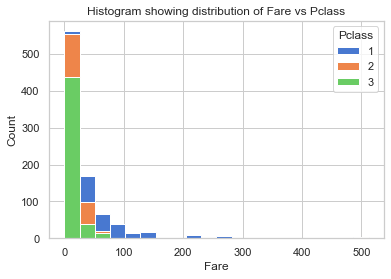

In [15]:
sns.set(style="whitegrid")
sns.histplot(data=titanic, x="Fare",hue='Pclass', palette="muted",multiple='stack',alpha=1,bins=20)
plt.title('Histogram showing distribution of Fare vs Pclass')
plt.show()

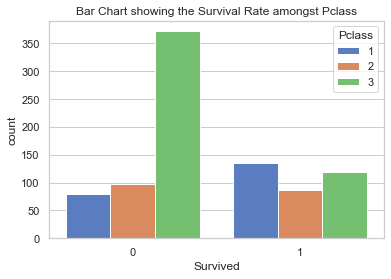

In [16]:
sns.countplot(x="Survived", hue="Pclass", palette="muted",data=titanic)
plt.title('Bar Chart showing the Survival Rate amongst Pclass')
plt.show()

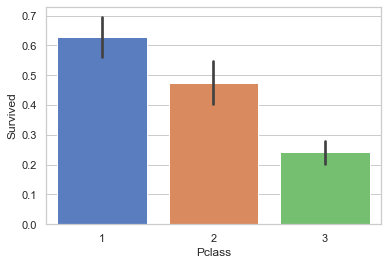

In [17]:
sns.barplot(y="Survived", x="Pclass", palette="muted",data=titanic)
plt.show()

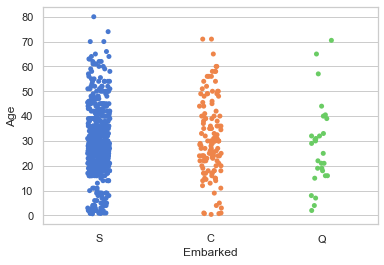

In [18]:
sns.stripplot(x='Embarked',y='Age',data=titanic, palette='muted',jitter=True)

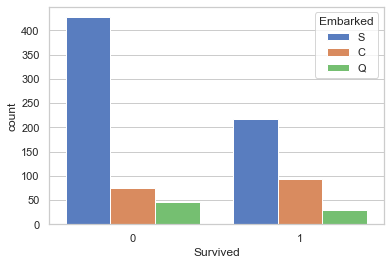

In [19]:
sns.countplot(x="Survived", hue="Embarked", palette="muted",data=titanic)
plt.show()

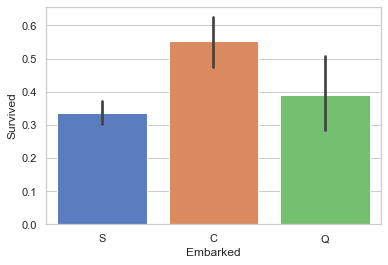

In [20]:
sns.barplot(y="Survived", x="Embarked", palette="muted",data=titanic)
plt.show()

# Data Preparation

## Handle missing values

In [21]:
# Age has some missing values which needs to be filled
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
model_mean_age = titanic['Age'].mean()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The PassengerId column is a running sequence for the observations and the Ticket and Cabin number are unique identification numbers, making them a less likely predictor. As such, we would be dropping them from our analysis. 

On the other hand, more than half of the observations in the Embarked columns are missing values and therefore we will removing it from the analysis.


In [22]:
# Drop the PassengerId, Name, Ticket, Cabin and Embarked
titanicdf=titanic.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)
titanicdf.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [23]:
# Convert Sex into binary terms
titanicdf['Sex']= titanicdf['Sex'].replace(['male','female'],[0,1])
titanicdf.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [24]:
titanicdf.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Since all values are numeric, we can now do a correlation and sort them to determine the most important features relative to Survival outcome

In [25]:
corr = titanicdf.corr()
corr.sort_values(["Survived"], ascending = False, inplace = True)
print(corr.Survived)

Survived    1.000000
Sex         0.543351
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64


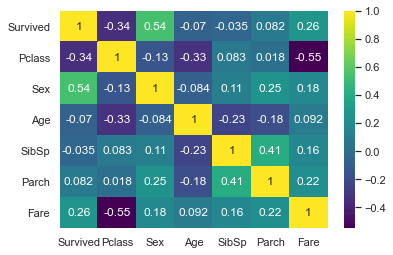

In [26]:
corrMatrix = titanicdf.corr()
sns.heatmap(corrMatrix, cmap='viridis',annot=True)
plt.show()

# Train Model

## Split Data into Train and Test Sets

In [27]:

y = titanicdf["Survived"].values
X = titanicdf.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)



# Train Model with Algorithm: Logistics Regression 

In [28]:
# Train Model with Logistics Regression

clr = LogisticRegression(random_state=42)
clr.fit(X_train,y_train)
clr

LogisticRegression(random_state=42)

In [29]:
param_grid={'C':np.logspace(-6, 5, 12)}
clr_cv = GridSearchCV(clr, param_grid,cv=5)
clr_cv.fit(X_train,y_train)

print('Best Parameters:',clr_cv.best_params_)
print('Best Scores:',round(clr_cv.best_score_*100,2))

Best Parameters: {'C': 1.0}
Best Scores: 79.07


In [82]:
clr = LogisticRegression(C=1,random_state=42)
clr.fit(X_train,y_train)

LogisticRegression(C=1, random_state=42)

## Score Model and Evaluate Model with:  Logistics Regression

In [83]:
# score model for test set
y_hat_clr= clr.predict(X_test)

In [84]:
# Accuracy score for test set

clr_score = round(accuracy_score(y_test, y_hat_clr)*100,2)
print("Accuracy score for the test set={:.2f}%".format(clr_score))
print()

precision_clr=np.round(precision_score(y_test, y_hat_clr),2)
recall_clr= np.round(recall_score(y_test, y_hat_clr),2)
f1_clr=np.round(f1_score(y_test, y_hat_clr),2)


Accuracy score for the test set=81.01%




# Train Model with Algorithm: KNeighborsClassifier


In [34]:
#Train model with KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [35]:
param_grid={'n_neighbors': (np.linspace(1, 10, 10)).astype(int)}
knn_cv = GridSearchCV(knn, param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print('Best Parameters:',knn_cv.best_params_)
print('Best Scores:',round(knn_cv.best_score_,2))


Best Parameters: {'n_neighbors': 3}
Best Scores: 0.71


In [79]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

# Score Model and Evaluate Model with: KNeighborsClassifier

In [85]:
# score model for test set
y_hat_knn= knn.predict(X_test)


In [86]:
# Accuracy score for test set

knn_score = round(accuracy_score(y_test, y_hat_knn)*100,2)
print("Accuracy score for the test set={:.2f}%".format(knn_score))

precision_knn=np.round(precision_score(y_test, y_hat_knn),2)
recall_knn= np.round(recall_score(y_test, y_hat_knn),2)
f1_knn=np.round(f1_score(y_test, y_hat_knn),2)


Accuracy score for the test set=69.27%


# Train Model with Algorithm: SVC

In [40]:
# Train Model with SVC

svc = SVC()
svc.fit(X_train,y_train)
svc.get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [41]:
param_grid={'kernel':['rbf','linear']}
svc_cv = GridSearchCV(svc, param_grid,cv=5)
svc_cv.fit(X_train,y_train)

print('Best Parameters:',svc_cv.best_params_)
print('Best Scores:',round(svc_cv.best_score_,2))


Best Parameters: {'kernel': 'linear'}
Best Scores: 0.79


In [42]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)


SVC(kernel='linear')

# Score Model and Evaluate Model with: SVC

In [87]:
# score model for test set
y_hat_svc= svc.predict(X_test)


In [88]:
# Accuracy score for test set

svc_score = round(accuracy_score(y_test, y_hat_svc)*100,2)
print("Accuracy score for the test set={:.2f}%".format(svc_score))
print()

precision_svc=np.round(precision_score(y_test, y_hat_svc),2)
recall_svc= np.round(recall_score(y_test, y_hat_svc),2)
f1_svc=np.round(f1_score(y_test, y_hat_svc),2)


Accuracy score for the test set=78.21%



# Train Model with Algorithm: GaussianNB

In [46]:
# Train Model with GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

# Score Model and Evaluate Model with: GaussianNB


In [47]:
# score model for test set
y_hat_gnb= gnb.predict(X_test)


In [49]:
# Accuracy score for test set

gnb_score = round(accuracy_score(y_test, y_hat_gnb)*100,2)
print("Accuracy score for the test set={:.2f}%".format(gnb_score))
print()

precision_gnb=np.round(precision_score(y_test, y_hat_gnb),2)
recall_gnb= np.round(recall_score(y_test, y_hat_gnb),2)
f1_gnb=np.round(f1_score(y_test, y_hat_gnb),2)


Accuracy score for the test set=77.09%



# Train Model with Algorithm: Decision Tree Classifier

In [50]:
# Train Model with Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc


DecisionTreeClassifier()

# Score Model and Evaluate Model with: Decision Tree Classifier


In [51]:
# score model for test set
y_hat_dtc= dtc.predict(X_test)


In [53]:
# Accuracy score for test set

dtc_score = round(accuracy_score(y_test, y_hat_dtc)*100,2)
print("Accuracy score for the test set={:.2f}%".format(dtc_score))
print()

precision_dtc=np.round(precision_score(y_test, y_hat_dtc),2)
recall_dtc= np.round(recall_score(y_test, y_hat_dtc),2)
f1_dtc=np.round(f1_score(y_test, y_hat_dtc),2)


Accuracy score for the test set=75.42%



# Train Model with Algorithm: Random Forest Classifier

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc


RandomForestClassifier()

In [55]:
param_grid={'n_estimators': np.arange(50,350,50),'min_samples_leaf':(np.linspace(1, 2, 2)).astype(int)}
rfc_cv = GridSearchCV(rfc, param_grid,cv=5)
rfc_cv.fit(X_train,y_train)

print('Best Parameters:',rfc_cv.best_params_)
print('Best Scores:',round(rfc_cv.best_score_,2))



Best Parameters: {'min_samples_leaf': 2, 'n_estimators': 200}
Best Scores: 0.83


In [76]:
rfc = RandomForestClassifier(n_estimators=200,min_samples_leaf=2)
rfc.fit(X_train,y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

# Score Model and Evaluate Model with: Random Forest Classifier

In [89]:
# score model for test set
y_hat_rfc= rfc.predict(X_test)


In [90]:
# Accuracy score for test set

rfc_score = round(accuracy_score(y_test, y_hat_rfc)*100,2)
print("Accuracy score for the test set={:.2f}%".format(rfc_score))
print()

precision_rfc=np.round(precision_score(y_test, y_hat_rfc),2)
recall_rfc= np.round(recall_score(y_test, y_hat_rfc),2)
f1_rfc=np.round(f1_score(y_test, y_hat_rfc),2)



Accuracy score for the test set=82.12%



# Comparing Model Accuracy Scores

In [91]:
model_results=pd.DataFrame({
    'Model':['KNN','Logistic Regression','GaussianNB','SVC','Decision Tree','Random Forest'],
    'Score (%)':[knn_score,clr_score,gnb_score,svc_score,dtc_score,rfc_score],
    'Precision Score':[precision_knn,precision_clr,precision_gnb,precision_svc,precision_dtc,precision_rfc],
    'Recall Score':[recall_knn,recall_clr,recall_gnb,recall_svc,recall_dtc,recall_rfc],
    'f1 Score':[f1_knn,f1_clr,f1_gnb,f1_svc,f1_dtc,f1_rfc]
})

model1 = model_results.sort_values(by='Score (%)', ascending=False)
model1 = model1.reset_index()
model1 = model1.drop(columns='index')

model1

,Model,Score (%),Precision Score,Recall Score,f1 Score
0,Random Forest,82.12,0.83,0.72,0.77
1,Logistic Regression,81.01,0.80,0.72,0.76
2,SVC,78.21,0.75,0.70,0.73
3,GaussianNB,77.09,0.73,0.72,0.72
4,Decision Tree,75.42,0.71,0.68,0.69
5,KNN,69.27,0.67,0.50,0.57


# Random Forest Classifier scored the best across all metrics. 

A precision score of 0.83 means that a passenger survival rate is correctly classified 83% of the time. We also achieved a recall score of 0.72, indicating that the model predicted the survival of 72% of the people who actually survived.

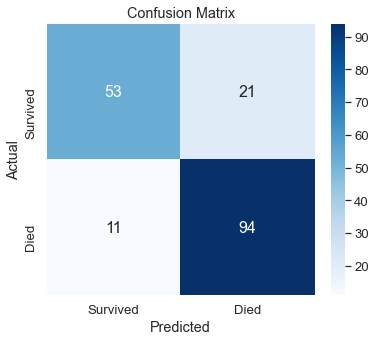

In [107]:
# evaluate model for test set

class_names=["Survived","Died"]
cm_rfc = confusion_matrix(y_test, y_hat_rfc, labels=[1,0])
df_cm_rfc = pd.DataFrame(cm_rfc, columns=class_names, index = class_names)
df_cm_rfc.index.name = 'Actual'
df_cm_rfc.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm_rfc, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.show()


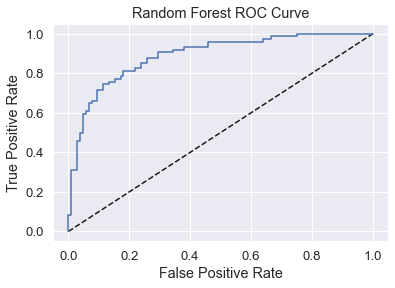

ROC Score:88.94%


In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_rfc = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show();

print('ROC Score:{:,.2f}%'.format(roc_auc_score(y_test,y_pred_prob_rfc)*100))

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).The ROC curve for Random Forest Classifier is close to the top-left corner, indicating a rather good performance.The ROC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier. We achieved a ROC score of ~89%, which is close to 1, allowing us to be fairly confident of the model effectiveness.  

# Submitting to Kaggle

## Stupid Baseline (Everyone Dies)

The stupid baseline is based on the majority of *Survived* status. In which case, we will have a rule which states that everybody died in the Titanic. 

In [94]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = 0
dfout[:5]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [95]:
dfout.to_csv("stupidbaseline.csv",index=False)

## Data Preparation for the test.csv

In [96]:
titanictest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [97]:
titanictestdf = titanictest.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000


In [98]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [99]:
# fill in the missing age
titanictestdf['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [100]:
# fill in the missing fare with the mean fare
titanictestdf['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [101]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [102]:
# Convert Sex into binary terms
predictdf=titanictestdf
predictdf['Sex']= predictdf['Sex'].replace(['male','female'],[0,1])
predictdf.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [103]:
Xp = predictdf.values
Xp[:2]

array([[ 3.    ,  0.    , 34.5   ,  0.    ,  0.    ,  7.8292],
       [ 3.    ,  1.    , 47.    ,  1.    ,  0.    ,  7.    ]])

## Prediction with Logistics Regression Trained Model

In [104]:
yp_hat = rfc.predict(Xp)

In [105]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [106]:
dfout.to_csv("lrpredict.csv",index=False)

# Conclusions

Using the model on the test dataset, we achieve a accuracy score of 77.51% on Kaggle, which is higher than accuracy score of 62.20% achieved by the Stupid Baseline model. 

In conclusion, our model is good at predicting the survival outcome of passengers, whereby it achieved accurancy scores of more than 77% on all metrics. 



# References

## Tutorials
- [Titanic Data Science Solutions Python Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [An Interactive Data Science Tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)